In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

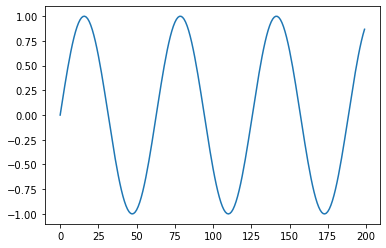

In [3]:
series = np.sin(0.1*np.arange(200))
plt.plot(series)

In [4]:
T = 10
X = []
Y = []
for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)
X = np.array(X).reshape(-1,T)
Y = np.array(Y)
N = len(X)
print(X.shape)
print(Y.shape)

(190, 10)
(190,)


In [5]:
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i,x)
model.compile(loss='mse',
              optimizer=Adam(lr=0.1))
r = model.fit(X[:-N//2], Y[:-N//2], epochs=80, validation_data=(X[-N//2:], Y[-N//2:]))

Train on 95 samples, validate on 95 samples
Epoch 1/80
95/95 [==============================] - 1s 7ms/sample - loss: 0.6666 - val_loss: 0.3501
Epoch 2/80
95/95 [==============================] - 0s 316us/sample - loss: 0.5132 - val_loss: 0.3822
Epoch 3/80
95/95 [==============================] - 0s 263us/sample - loss: 0.1876 - val_loss: 0.0651
Epoch 4/80
95/95 [==============================] - 0s 263us/sample - loss: 0.1631 - val_loss: 0.1734
Epoch 5/80
95/95 [==============================] - 0s 263us/sample - loss: 0.1619 - val_loss: 0.0115
Epoch 6/80
95/95 [==============================] - 0s 263us/sample - loss: 0.0176 - val_loss: 0.0575
Epoch 7/80
95/95 [==============================] - 0s 263us/sample - loss: 0.0983 - val_loss: 0.0441
Epoch 8/80
95/95 [==============================] - 0s 263us/sample - loss: 0.0335 - val_loss: 0.0175
Epoch 9/80
95/95 [==============================] - 0s 263us/sample - loss: 0.0283 - val_loss: 0.0539
Epoch 10/80
95/95 [=====================

Epoch 76/80
95/95 [==============================] - 0s 263us/sample - loss: 1.2580e-10 - val_loss: 3.7224e-12
Epoch 77/80
95/95 [==============================] - 0s 263us/sample - loss: 6.2272e-11 - val_loss: 5.5251e-11
Epoch 78/80
95/95 [==============================] - 0s 210us/sample - loss: 4.6180e-11 - val_loss: 7.9369e-11
Epoch 79/80
95/95 [==============================] - 0s 210us/sample - loss: 5.5954e-11 - val_loss: 2.0209e-11
Epoch 80/80
95/95 [==============================] - 0s 210us/sample - loss: 5.0075e-11 - val_loss: 2.1297e-11


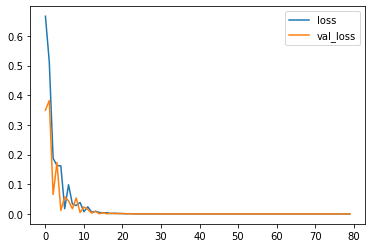

In [7]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [8]:
validation_target = Y[-N//2:]
validation_predictions = []
last_x = X[-N//2]
while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1,-1))[0,0]
    
    validation_predictions.append(p)
    
    last_x = np.roll(last_x,-1)
    last_x[-1] = p

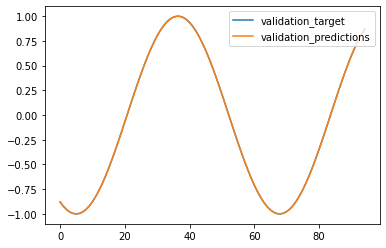

In [9]:
plt.plot(validation_target, label='validation_target')
plt.plot(validation_predictions, label='validation_predictions')
plt.legend()